In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

In [2]:
if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("Please install GPU version of TF")

Default GPU Device: /device:GPU:0


In [3]:
# Import MNIST data
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
index =2

In [ ]:
index += 1

In [ ]:
index -= 1

In [ ]:
plt.title(f"{y_train[index]}")
plt.imshow(x_train[index], cmap=plt.get_cmap('gray'))

In [ ]:
plt.imsave(f'{y_train[index]}.png',x_train[index],cmap=plt.cm.gray)

In [9]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [10]:
x_train.shape

(60000, 28, 28)

In [11]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [ ]:
plt.imshow(x_train[0], cmap=plt.cm.binary)

In [12]:
model = tf.keras.models.Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 5, 5, 64)          0

In [13]:
model.fit(x_train,y_train,epochs=10,validation_data=(x_test,y_test))

Epoch 1/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1928 - accuracy: 0.9395 - val_loss: 0.0531 - val_accuracy: 0.9829
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0703 - accuracy: 0.9784 - val_loss: 0.0485 - val_accuracy: 0.9837
Epoch 3/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.0515 - accuracy: 0.9835 - val_loss: 0.0333 - val_accuracy: 0.9893
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0433 - accuracy: 0.9869 - val_loss: 0.0338 - val_accuracy: 0.9884
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0377 - accuracy: 0.9876 - val_loss: 0.0274 - val_accuracy: 0.9912
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0332 - accuracy: 0.9893 - val_loss: 0.0276 - val_accuracy: 0.9908
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0300 - accuracy: 0.9902 - val_loss: 0.0287 - val_accuracy:

Prediction:  8
Real:  8


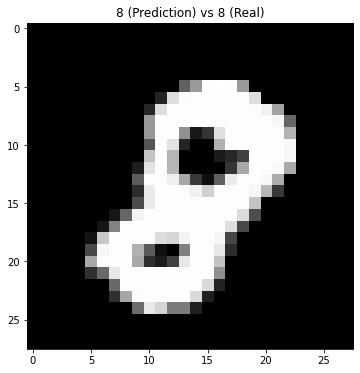

In [14]:
index = random.randint(0, len(x_test))

prediction = np.argmax(model.predict(x_test[index].reshape(-1, 28, 28, 1)))
real = y_test[index]
plt.figure(figsize=(6, 6))
print("Prediction: ", prediction)
print("Real: ", real)
plt.title('{} (Prediction) vs {} (Real)'.format(prediction, real))
plt.imshow(x_test[index].reshape(28, 28), cmap=plt.cm.gray)

In [15]:
model.save('mnist_model_cnn.h5')

In [ ]:
model = tf.keras.models.load_model('mnist_model_cnn.h5')

In [16]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0261 - accuracy: 0.9911


[0.026087123900651932, 0.991100013256073]

In [ ]:
x_test[0].reshape(28,28)

In [ ]:
model.evaluate(x_test,y_test)

In [ ]:
def get_prediction_fail(start,stop):
    predicted_fail = {}
    for index in range(start,stop):

        predictions = np.argmax(model.predict(np.array([x_test[index]])))
        real = y_test[index]
        if predictions != y_test[index]:
            predicted_fail.update({index:(predictions,real)})
    return predicted_fail


In [17]:
import gradio as gr

def classify(img):
    img = np.array(img)
    img = img / 255.0
    img = img.reshape(1,28,28,1)
    prediction = model.predict(img).tolist()
    return {str(i) : prediction[0][i] for i in range(10)}

inputs = gr.inputs.Image(image_mode='L', 
                  source='canvas', 
                  shape=(28, 28), 
                  invert_colors=True, 
                  tool= 'select')
output = gr.outputs.Label(num_top_classes=10)
gr.Interface(classify, inputs, output,title="Mnist prediction").launch()

IMPORTANT: You are using gradio version 2.4.6, however version 2.5.1 is available, please upgrade.
--------
Running on local URL:  http://127.0.0.1:7860/

To create a public link, set `share=True` in `launch()`.


(<Flask 'gradio.networking'>, 'http://127.0.0.1:7860/', None)